In [117]:
from scipy.stats import skew
import time
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors  # importing the library
from scipy.stats import norm
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

warnings.filterwarnings('ignore')


In [105]:
data_rfm = pd.read_csv('../data/RFM_score.csv')
data_rfm


,R,F,M
0,4,4,1
1,1,2,2
2,2,5,5
3,5,3,2
4,5,5,5
...,...,...,...
5417,2,4,4
5418,3,4,1
5419,1,1,2
5420,1,1,1


Plotting functions

In [106]:
def plot_2d(data, col):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    for i in range(2):
        for j in range(2):
            axs[i, j].scatter(data[col[i]], data[col[j]],
                              c=data['Cluster'], cmap='viridis', s=5)
            axs[i, j].set_xlabel(col[i])
            axs[i, j].set_ylabel(col[j])
    fig.tight_layout()


Normalizing Data

In [107]:
def normalize_data(data, columns):
    scaler = preprocessing.MinMaxScaler()
    d = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(d, columns=columns)
    for c in columns:
        data['N'+c] = scaled_df[c]


In [108]:
normalize_data(data_rfm, ['R', 'F', 'M'])
data_rfm.head()


,R,F,M,NR,NF,NM
0,4,4,1,0.75,0.75,0.00
1,1,2,2,0.00,0.25,0.25
2,2,5,5,0.25,1.00,1.00
3,5,3,2,1.00,0.50,0.25
4,5,5,5,1.00,1.00,1.00


In [109]:
data_rfm = data_rfm[['NR', 'NF', 'NM']]
data_rfm.head()


,NR,NF,NM
0,0.75,0.75,0.00
1,0.00,0.25,0.25
2,0.25,1.00,1.00
3,1.00,0.50,0.25
4,1.00,1.00,1.00


PCA

In [110]:
pca = PCA(n_components=2, whiten=False).fit(data_rfm)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)
transformados = pca.fit_transform(data_rfm)
print(transformados)


[0.61221449 0.26124009]
[35.36880171 23.10406795]
[[-0.51388895 -0.61372637 -0.59938143]
 [-0.84470938  0.2401557   0.47832134]]
[[ 0.02118204 -0.35243918]
 [ 0.56361658  0.28059534]
 [-0.47468651  0.60827577]
 ...
 [ 0.71704817  0.22055641]
 [ 0.86689352  0.10097608]
 [ 0.5849897  -0.05016234]]


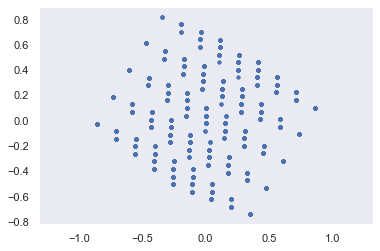

In [111]:
plt.plot(transformados[:, 0], transformados[:, 1], '.')
plt.axis('equal')
plt.grid()


In [176]:
rfmdf = pd.DataFrame(transformados)
rfmdf.columns = ['x', 'y']
rfmdf.reset_index()
#rfmdf = rfmdf.head(5)
rfmdf


,x,y
0,0.021182,-0.352439
1,0.563617,0.280595
2,-0.474687,0.608276
3,-0.103704,-0.504075
4,-0.860103,-0.025256


In [179]:
print(rfmdf.shape)
#print(rfmdf) 

(5, 2)
          x         y
0  0.021182 -0.352439
1  0.563617  0.280595
2 -0.474687  0.608276
3 -0.103704 -0.504075
4 -0.860103 -0.025256


Parametrización de DBSCAN

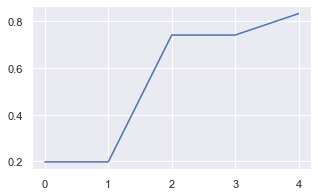

In [177]:
# Parametrización de DBSCAN.
# creating an object of the NearestNeighbors class
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(rfmdf)  # fitting the data to the object
distances, indices = nbrs.kneighbors(rfmdf)  # finding the nearest neighbours
distances = np.sort(distances, axis=0)  # sorting the distances
distances = distances[:, 1]  # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5, 3)  # setting the figure size
plt.plot(distances)  # plotting the distances
#plt.xlim([5000, 5450])
#plt.ylim([0, 8])
plt.show()  # showing the plot


DBSCAN

In [173]:
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.16476020, min_samples=4).fit(rfmdf)  # fitting the model

labels = dbscan.labels_  # getting the labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)


print(n_clusters_)


11


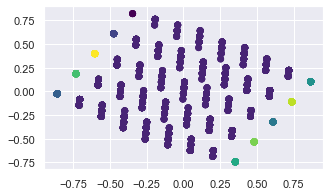

' plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters\nplt.xlabel("Income") # X-axis label\nplt.ylabel("Spending Score") # Y-axis label\nplt.show() # showing the plot '

In [172]:
#plt.figure(figsize=(10, 10))
plt.scatter('x', 'y', c=labels, cmap='viridis', s=35, data=rfmdf)
plt.show()
''' plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot '''
